In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading in the data 

In [30]:
items = pd.read_csv('data.csv')

In [3]:
print(items.shape)
items.head()

(705857, 9)


,store_number,item_number,date,number_of_item_on_file,cant_find_times_this_month,weekly_sales,item_category,store_type,in_store_flag
0,1911,9224620,2020-11-24,28,2,40.791665,BAG PASTA,SC,True
1,148,563046559,2020-11-12,7,1,0.458333,BAKING MIXES,SC,False
2,1052,555089121,2020-11-12,11,1,10.633334,COLD CEREAL,SC,True
3,3317,565914006,2020-11-18,16,5,23.283333,SUGAR,SC,True
4,2465,563007859,2020-11-19,14,2,4.216667,BAKING MIXES,SC,True


In [4]:
#column types
items.dtypes

store_number                    int64
item_number                     int64
date                           object
number_of_item_on_file          int64
cant_find_times_this_month      int64
weekly_sales                  float64
item_category                  object
store_type                     object
in_store_flag                    bool
dtype: object

In [5]:
#unique values per column
items.nunique()

store_number                   4229
item_number                   17182
date                             29
number_of_item_on_file         1169
cant_find_times_this_month       26
weekly_sales                   2898
item_category                    68
store_type                        2
in_store_flag                     2
dtype: int64

In [6]:
#Looking for missing data
items.isnull().sum()

store_number                    0
item_number                     0
date                            0
number_of_item_on_file          0
cant_find_times_this_month      0
weekly_sales                  126
item_category                 470
store_type                      0
in_store_flag                   0
dtype: int64

In [ ]:
#126 missing weekly sales, 470 missing item_category

In [ ]:
#exploring missing weekly sales

In [31]:
missing_sales = items[items['weekly_sales'].isnull()]

In [8]:
print(missing_sales.shape) #126 rows
print(missing_sales.nunique()) #only 1 item category

(126, 9)
store_number                  123
item_number                   102
date                           24
number_of_item_on_file         39
cant_find_times_this_month      5
weekly_sales                    0
item_category                   1
store_type                      2
in_store_flag                   2
dtype: int64


In [50]:
missing_sales.head() #baking mixes

,store_number,item_number,date,number_of_item_on_file,cant_find_times_this_month,weekly_sales,item_category,store_type,in_store_flag
13788,1181,550431572,2020-11-27,14,3,NaN,BAKING MIXES,SC,True
17640,1959,567146575,2020-11-05,7,1,NaN,BAKING MIXES,SC,True
33086,651,573175295,2020-11-05,12,1,NaN,BAKING MIXES,SC,False
36101,1057,563008158,2020-11-22,2,1,NaN,BAKING MIXES,SC,True
42023,3591,563008129,2020-11-05,34,1,NaN,BAKING MIXES,SC,True


In [32]:
#avg of baking mixes weekly sales
baking = items[items['item_category']=='BAKING MIXES']

In [10]:
baking.describe()

,store_number,item_number,number_of_item_on_file,cant_find_times_this_month,weekly_sales
count,32891.000000,3.289100e+04,32891.000000,32891.000000,32765.000000
mean,2702.520781,4.287716e+08,14.520021,1.550455,6.492960
std,1832.267577,2.379665e+08,26.325831,1.063148,10.440261
min,21.000000,9.204290e+06,1.000000,0.000000,-0.183333
25%,1196.000000,5.502136e+08,4.000000,1.000000,1.100000
50%,2342.000000,5.630079e+08,8.000000,1.000000,2.841667
75%,4077.000000,5.660463e+08,15.000000,2.000000,7.883333
max,8978.000000,5.769039e+08,1188.000000,26.000000,256.575000


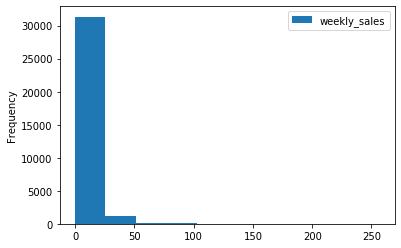

In [64]:
#lets look at histogram of these sales
baking.plot(y='weekly_sales',kind='hist')

In [14]:
#doesn't make sense to impute values here, lets just drop rows with missing sales
print((missing_sales.shape[0]/items.shape[0])*100) #0.01 % of total data

0.01785064113552745


In [33]:
#checking for missing item category
missing_cat = items[items['item_category'].isnull()]

In [18]:
print(missing_cat.shape)
missing_cat.head()

(470, 9)


,store_number,item_number,date,number_of_item_on_file,cant_find_times_this_month,weekly_sales,item_category,store_type,in_store_flag
1653,1979,550142307,2020-11-19,7,2,9.166666,NaN,SC,True
3116,1742,573707726,2020-11-19,7,1,1.650000,NaN,SC,True
3498,1536,573707726,2020-11-06,3,1,3.666667,NaN,SC,True
5034,5193,550142307,2020-11-09,28,1,1.558333,NaN,SC,False
5282,2662,573707726,2020-11-12,5,1,2.108333,NaN,SC,False


In [34]:
missing_cat.nunique() #doesn't seem to be any pattern to missing

store_number                  422
item_number                     9
date                           28
number_of_item_on_file         41
cant_find_times_this_month      8
weekly_sales                  201
item_category                   0
store_type                      2
in_store_flag                   2
dtype: int64

In [35]:
#lets explore these item numbers, does each item number correspond to unique item category?
#if yes, we can impute them
missing_cat['item_number'].unique()

array([550142307, 573707726, 573707727,   9283885, 564167064, 551558976,
       552070232, 554766009, 576280642], dtype=int64)

In [43]:
item_cat = items.groupby('item_number')['item_category'].nunique()

In [44]:
print(max(item_cat),min(item_cat))

1 0


In [45]:
item_cat[item_cat==0] #these are the same 9, they don't have any item category

item_number
9283885      0
550142307    0
551558976    0
552070232    0
554766009    0
564167064    0
573707726    0
573707727    0
576280642    0
Name: item_category, dtype: int64

In [118]:
#therefore we only drop missing sales
items_upd = items[items['weekly_sales'].notna()]
print(items_upd.shape)

(705731, 9)


In [88]:
items_upd.describe() #there may ne outliers in number_of... and negative weekly sales

,store_number,item_number,number_of_item_on_file,cant_find_times_this_month,weekly_sales
count,705731.000000,7.057310e+05,705731.000000,705731.000000,705731.000000
mean,2752.044156,3.951805e+08,19.194019,1.683799,12.093208
std,1828.550121,2.541178e+08,90.454358,1.226827,22.589646
min,21.000000,4.002626e+06,1.000000,0.000000,-18.425000
25%,1242.000000,9.284340e+06,4.000000,1.000000,2.383333
50%,2448.000000,5.544956e+08,9.000000,1.000000,5.866667
75%,4177.000000,5.660270e+08,16.000000,2.000000,13.566666
max,8978.000000,5.779259e+08,30910.000000,27.000000,3899.866577


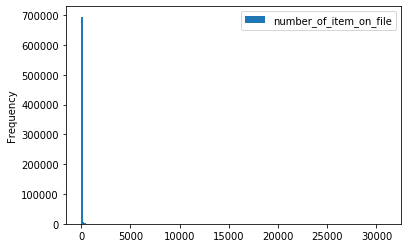

In [70]:
#number_of plot
items_upd.plot(y='number_of_item_on_file',kind='hist',bins=200)
#75% is 16, dont see any bar even close to 5000

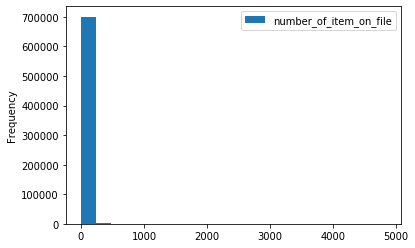

In [74]:
#removing above 5000 and replotting
items_upd[items_upd['number_of_item_on_file']<5000].plot(y='number_of_item_on_file',kind='hist',bins=20)
#looks like we can get stricter

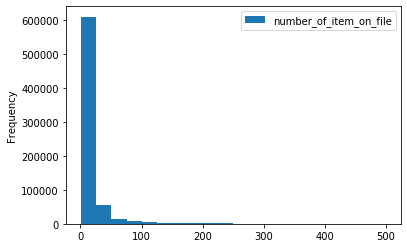

In [76]:
items_upd[items_upd['number_of_item_on_file']<500].plot(y='number_of_item_on_file',kind='hist',bins=20)

In [90]:
print(items_upd[items_upd['number_of_item_on_file']<100].shape[0]/items_upd.shape[0])
print(items_upd[items_upd['number_of_item_on_file']<200].shape[0]/items_upd.shape[0])
print(items_upd[items_upd['number_of_item_on_file']<300].shape[0]/items_upd.shape[0])
print(items_upd[items_upd['number_of_item_on_file']<500].shape[0]/items_upd.shape[0])
print(items_upd[items_upd['number_of_item_on_file']<1000].shape[0]/items_upd.shape[0])
print(items_upd[items_upd['number_of_item_on_file']<5000].shape[0]/items_upd.shape[0])

0.9729854576318739
0.9893642195114002
0.9948663159192384
0.9978462048570914
0.9995026433584467
0.9999617417968036


In [119]:
#without any context it is dangerous to remove, but 500 seems to be a conservative estimate
items_upd = items_upd[items_upd['number_of_item_on_file']<500]
print(items_upd.shape[0])

704211


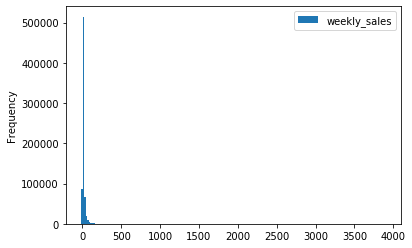

In [120]:
#negative sales & outliers
items_upd.plot(y='weekly_sales',kind='hist', bins=200)

In [121]:
print(items_upd[items_upd['weekly_sales']>=0].shape[0]/items_upd.shape[0])
print(items_upd[items_upd['weekly_sales']<1000].shape[0]/items_upd.shape[0])
print(items_upd[items_upd['weekly_sales']<500].shape[0]/items_upd.shape[0])
print(items_upd[items_upd['weekly_sales']<300].shape[0]/items_upd.shape[0])

0.9998849776558446
0.9999900597974186
0.9999588191607345
0.999693273748919


In [124]:
#1000 is a conservative estimate -> can be updates with context
#removing negative sales
items_upd=items_upd[(items_upd['weekly_sales']>=0) & (items_upd['weekly_sales']<1000)]
items_upd.shape[0]

704123

In [125]:
items_upd.describe()

,store_number,item_number,number_of_item_on_file,cant_find_times_this_month,weekly_sales
count,704123.000000,7.041230e+05,704123.000000,704123.000000,704123.000000
mean,2752.655153,3.956604e+08,17.074584,1.681395,11.884395
std,1828.735047,2.539098e+08,33.949123,1.222271,19.864074
min,21.000000,4.002626e+06,1.000000,0.000000,-0.000000
25%,1242.000000,9.284424e+06,4.000000,1.000000,2.383333
50%,2449.000000,5.545153e+08,9.000000,1.000000,5.866667
75%,4179.000000,5.660270e+08,16.000000,2.000000,13.475000
max,8978.000000,5.779259e+08,499.000000,27.000000,906.858356


Data cleaning is now completed
Next Step: understanding response variable

In [128]:
items_upd['in_store_flag'].value_counts() #no issue of class imbalance

count     704123
unique         2
top         True
freq      460642
Name: in_store_flag, dtype: object


True     460642
False    243481
Name: in_store_flag, dtype: int64

In [134]:
items_upd[items_upd['in_store_flag']==True].shape[0] / items_upd.shape[0]
#65% of items were still in store, although associate could not find them

0.6542067224050343

In [138]:
#next lets explore the predictor variables
#1: date
items_upd['date'].value_counts().sort_values() 
#needs to be converted to date time format

2020-11-29      3429
2020-11-30      5753
2020-11-01      7486
2020-11-03     10228
2020-11-24     10244
2020-11-14     10716
2020-11-21     11144
2020-11-02     11271
2020-11-07     11277
2020-11-11     11573
2020-11-28     11982
2020-11-25     12048
2020-11-18     12507
2020-11-23     12720
2020-11-22     12743
2020-11-08     12905
2020-11-27     13021
2020-11-04     13736
2020-11-15     13738
2020-11-13     13926
2020-11-09     14386
2020-11-06     14420
2020-11-20     14494
2020-11-16     15210
2020-11-17     21882
2020-11-26     78804
2020-11-12    105573
2020-11-19    105683
2020-11-05    111224
Name: date, dtype: int64

In [142]:
items_upd['date'] = pd.to_datetime(items_upd['date'])

In [146]:
items_upd.groupby('date')['date'].count() #nov 10th missing, which is a Tuesday

date
2020-11-01      7486
2020-11-02     11271
2020-11-03     10228
2020-11-04     13736
2020-11-05    111224
2020-11-06     14420
2020-11-07     11277
2020-11-08     12905
2020-11-09     14386
2020-11-11     11573
2020-11-12    105573
2020-11-13     13926
2020-11-14     10716
2020-11-15     13738
2020-11-16     15210
2020-11-17     21882
2020-11-18     12507
2020-11-19    105683
2020-11-20     14494
2020-11-21     11144
2020-11-22     12743
2020-11-23     12720
2020-11-24     10244
2020-11-25     12048
2020-11-26     78804
2020-11-27     13021
2020-11-28     11982
2020-11-29      3429
2020-11-30      5753
Name: date, dtype: int64

In [155]:
#date, instore flag 
date_store_counts = items_upd.groupby(['date','in_store_flag'])['date'].count()
date_store_counts # nothing too concerning, however thursday are higher volume -> add that in feature engineering

date        in_store_flag
2020-11-01  False             2663
            True              4823
2020-11-02  False             3846
            True              7425
2020-11-03  False             3451
            True              6777
2020-11-04  False             4382
            True              9354
2020-11-05  False            34181
            True             77043
2020-11-06  False             5070
            True              9350
2020-11-07  False             4167
            True              7110
2020-11-08  False             4730
            True              8175
2020-11-09  False             5352
            True              9034
2020-11-11  False             3922
            True              7651
2020-11-12  False            33794
            True             71779
2020-11-13  False             5214
            True              8712
2020-11-14  False             4126
            True              6590
2020-11-15  False             5343
            True             

In [179]:
items_upd

,store_number,item_number,date,number_of_item_on_file,cant_find_times_this_month,weekly_sales,item_category,store_type,in_store_flag
0,1911,9224620,2020-11-24,28,2,40.791665,BAG PASTA,SC,True
1,148,563046559,2020-11-12,7,1,0.458333,BAKING MIXES,SC,False
2,1052,555089121,2020-11-12,11,1,10.633334,COLD CEREAL,SC,True
3,3317,565914006,2020-11-18,16,5,23.283333,SUGAR,SC,True
4,2465,563007859,2020-11-19,14,2,4.216667,BAKING MIXES,SC,True
